# Mbenja-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)
* [Verbreitung](#Verbreitung)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'MBJ'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [149]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K')
           AND ((t_Obj.Anzahl) != ''))""".replace('\n',' ')
# Anzahl != damit fotografierte Gefäße nicht mit dabei ist

df = pd.read_sql(sql, con)
# display(df.head())

In [150]:
a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Ausgezählt,52,33.766234
GE,102,66.233766


In [151]:
a[0].sum()

154

In [152]:
df.pivot_table(values = 'objID', index = 'Typ', aggfunc = len, margins = True)

Typ
MBJ             73.0
MBJ (?)         23.0
MBJ/PDM (?)     16.0
PDM/MBJ          3.0
PDM/MBJ (?)      5.0
All            120.0
Name: objID, dtype: float64

In [153]:
a = pd.Series({'sicher':len(df.loc[~df['Typ'].str.contains("/| ")].index),
               'fraglich':len(df.loc[df['Typ'].str.contains("/| ")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,47,39.166667
sicher,73,60.833333


In [154]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss Ort                             bef_nr                 
Ngoko     Bonga (Fpl. 279)                87/101       2      112
          Mbenja (Fpl. 277)               87/101       1       60
          Ngama (Fpl. 281)                87/101      16      368
          Ngoko Fkm 17 (Elali) (Fpl. 275) 87/101       6      253
          Ngwangala (Fpl. 278)            87/101       3       38
          Pandama (Fpl. 276)              87/101      17      511
Sangha    Bonda (Fpl. 272)                87/101      13      161
          Ikelemba (Fpl. 260)             87/101      16      156
          Maboko (Fpl. 267)               87/101       2       30
          Mai impembe (Fpl. 271)          87/101      13      381
                                          87/102       2       42
                                          87/103       2       20
          Mandombe (Fpl. 259)             87/101       2        8
          Molanda (Fpl. 258)              87/101      14      248
                                          87/103       1       82
          Mosanya (Fpl. 262)              87/101       5      106
          Ouesso (Fpl. 265)               87/101      11       72
                                          87/102      11      154
          Pikunda (Fpl. 255)              87/1         1        2
                                          87/2        15      107
          Sakao (Fpl. 273)                87/101       1       73

In [155]:
len(df_pivot.index)

21

Anzahl Stücke

In [156]:
np.sum(df_pivot['Anzahl'])

154

Gewicht insgesamt in kg:

In [157]:
np.sum(df_pivot['Gewicht']) / 1000

2.984

## Scherbentypen

In [158]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,NaN,NaN
R,26.0,16.883117
W,128.0,83.116883
B,0.0,0.000000


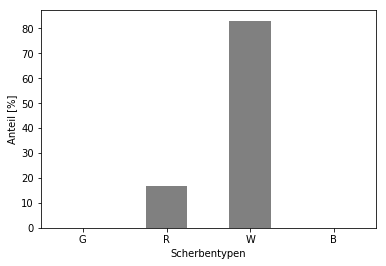

In [159]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [160]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [161]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


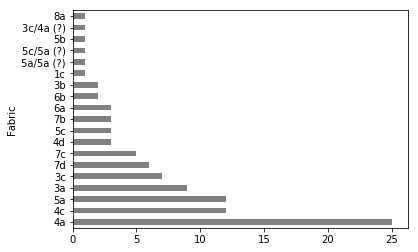

In [162]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [163]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
4a,25,25.510204
4c,12,12.244898
5a,12,12.244898
3a,9,9.183673
3c,7,7.142857


C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


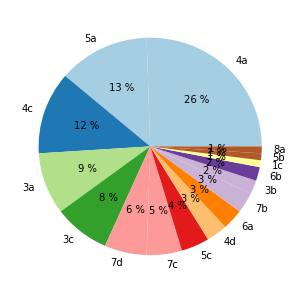

In [164]:
df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])\

a = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
a = pd.DataFrame(a)
a = a.sort_index(by=['Anzahl'], ascending=[False])

fig = plt.figure()
fig.set_size_inches(5, 5)
a['Anzahl'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [165]:
a = pd.Series({'1':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("1")]),
               '2':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("2")]),
               '3':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("3")]),
               '4':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("4")]),
               '5':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("5")]),
               '6':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("6")]),
               '7':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("7")]),
               '8':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("8")]),
               '9':sum(df1["Anzahl"].loc[df1["Fabric"].str.contains("9")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
1,1,1.020408
2,0,0.000000
3,19,19.387755
4,40,40.816327
5,18,18.367347
6,5,5.102041
7,14,14.285714
8,1,1.020408
9,0,0.000000


In [166]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,NaN,NaN
wenig,4.0,5.333333
mittel,17.0,22.666667
viel,45.0,60.000000
sehr viel,9.0,12.000000


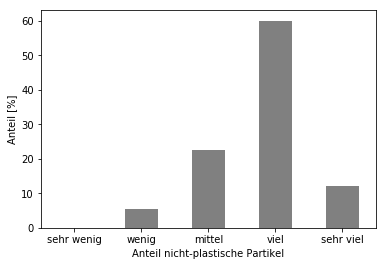

In [167]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [168]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,NaN,NaN
F,NaN,NaN
M,25.0,32.467532
C,36.0,46.753247
VC,16.0,20.779221


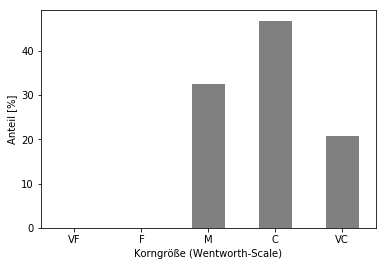

In [169]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [170]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,58,75.324675
S/Org,5,6.493506
S/Laterit,4,5.194805
Laterit,2,2.597403
wenig,2,2.597403
S/Laterit/Org,1,1.298701
S/Laterit?,1,1.298701
S/Schamott,1,1.298701
S/laterit,1,1.298701


### Brennfarbe

In [171]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,23,23.958333
Sonstig,60,62.500000
Weiß,13,13.541667


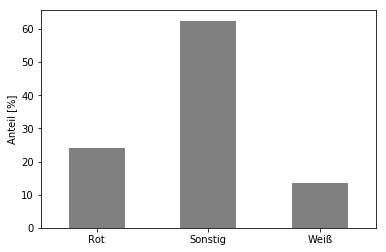

In [172]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [173]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

g        81
bg       72
s        41
br       34
         30
bg bg     8
g g       7
g bg      6
 bg       6
bg s      4
dtype: int64

### Oberfläche der Scherben

In [174]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt/inne rau,1,1.298701
außen glatt/innen rau,1,1.298701
glatt,43,55.844156
glatt/leicht rau,2,2.597403
leicht rau,26,33.766234
rau,4,5.194805


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


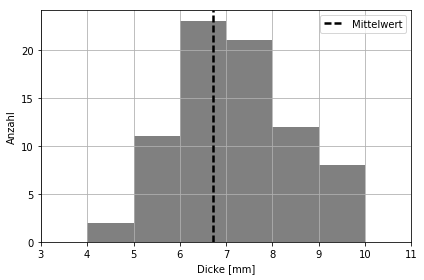

In [175]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
plt.xlabel("Dicke [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()

In [176]:
df['Wandung'].describe()

count    77.000000
mean      6.727273
std       1.324231
min       4.000000
25%       6.000000
50%       7.000000
75%       8.000000
max      10.000000
Name: Wandung, dtype: float64

In [177]:
df['Wandung'].var()

1.7535885167464111

## Gefäßformen

In [178]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [179]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)
# display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [180]:
df_pivot['objID'].sum()

30

In [181]:
df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,20,66.666667
sicher,10,33.333333


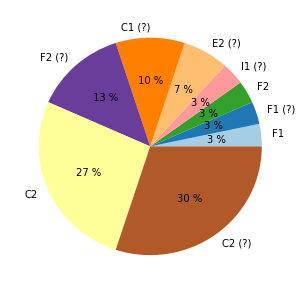

In [182]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


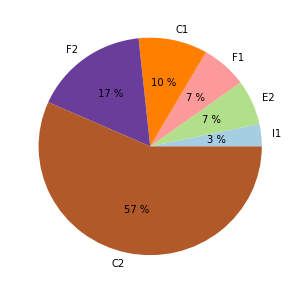

In [183]:
# löschen der (?)
df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['objID'], ascending=True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [184]:
len(df_pivot['objID'])    # Anzahl sicherer Gefäßformen

6

### Bauchformen

In [185]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Bauch
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Bauch) != '')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# die Fragezeichen bei Gef-Form & Bauch-Form einfach löschen
#df['Form_Gef'] = df['Form_Gef'].map(lambda x: x.rstrip(' (?)'))
#df['Form_Bauch'] = df['Form_Bauch'].map(lambda x: x.rstrip(' (?)'))

#display(df.head())

In [186]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Bauch,,
A1,17,40.476190
A3,5,11.904762
A3 (?),2,4.761905
D1,2,4.761905
C1/D1,2,4.761905
B1/D2,2,4.761905
B1/D1,1,2.380952
D2,1,2.380952
D1/D2 (?),1,2.380952


In [187]:
a = pd.Series({'ohne Knick':len(df.loc[~df['Form_Bauch'].str.contains("D1")].index),
               'mit Knick':len(df.loc[df['Form_Bauch'].str.contains("D1")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
mit Knick,8,19.047619
ohne Knick,34,80.952381


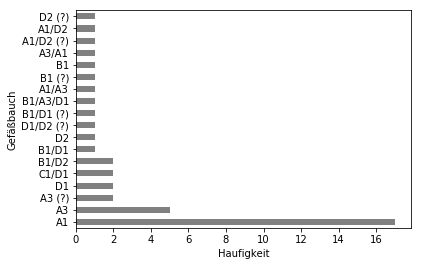

In [188]:
df_pivot.plot(y = 'objID', kind = 'barh', legend=False, color = 'grey')
plt.xlabel('Haufigkeit')
plt.ylabel('Gefäßbauch')

### Korrelation Gef-Form & Bauchform

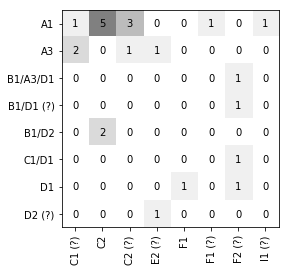

In [189]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Bauch', columns = 'Form_Gef', aggfunc = len, fill_value = 0)
#df_pivot
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

## Mündungs- & Randformen

In [190]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [191]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M2,10,47.619048
M1,6,28.571429
M3,2,9.523810
M3/M2,1,4.761905
M4,1,4.761905
M5/M4,1,4.761905


In [192]:
len(df_pivot['objID'])    # Anzahl beobachtete Mdgformen

6

In [193]:
# Zeilen ohne Mdg löschen
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,6,26.086957
B1.1,6,26.086957
B3,3,13.043478
B1 (?),2,8.695652
B1/B3,2,8.695652


In [194]:
a = pd.Series({'B1':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("B1")]),
               'nicht B1':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("B1")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
B1,17,73.913043
nicht B1,6,26.086957


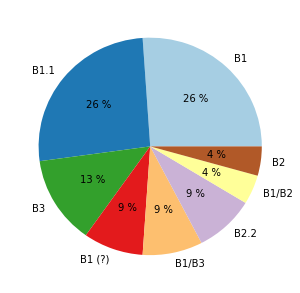

In [195]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [196]:
df_pivot['objID'].sum()   # Anzahl GE mit bestimmter Randform

23

In [197]:
len(df_pivot['objID'])    # Anzahl beobachtete Randformen

8

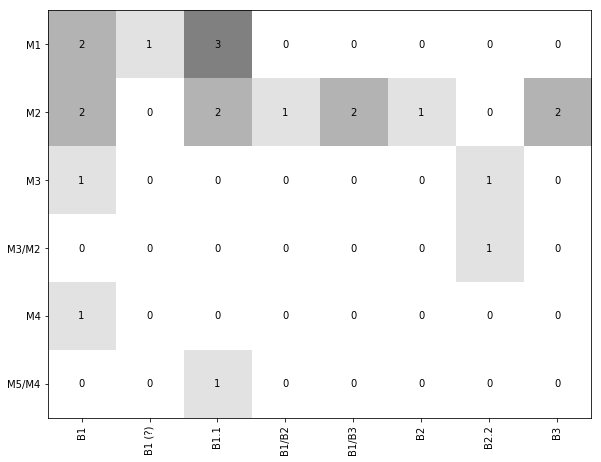

In [198]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Mdg', columns = 'Form_Rand', aggfunc = len, fill_value = 0)
fig = plt.figure()
fig.set_size_inches(12, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.show()

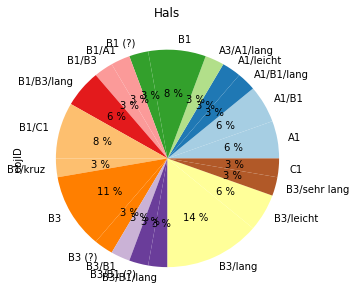

In [199]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

In [200]:
df_pivot = pd.DataFrame(df_pivot)
df_pivot

a = pd.Series({'lang':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("lang")]),
               'kurz':sum(df_pivot["objID"].loc[df_pivot.index.str.contains("kurz")]),
               'weder noch':sum(df_pivot["objID"].loc[~df_pivot.index.str.contains("lang|kurz")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
kurz,0,0.000000
lang,11,30.555556
weder noch,25,69.444444


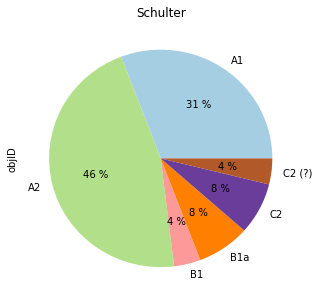

In [201]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

### Bodenformen

In [202]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df

,ort_kurz,ort_name,objID,Typ,Form_Gef,Form_Boden


## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


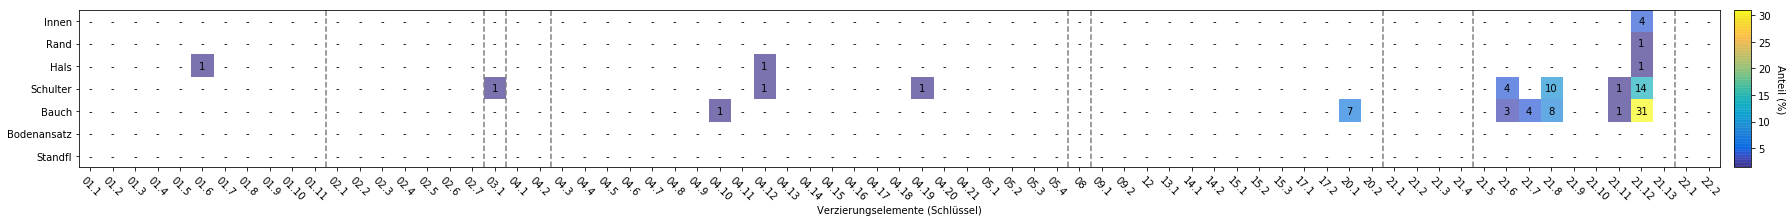

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-10_Mbenja_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [2]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzName_alt,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

In [3]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', aggfunc = len)
df_pivot = df_pivot.fillna(0)
# Sortierung für graphische Darstellung umdrehen
df_pivot = df_pivot.sort_index(ascending=True)
# heatmap siehe http://yonatanfriedman.com/docs/survey/plotting.html

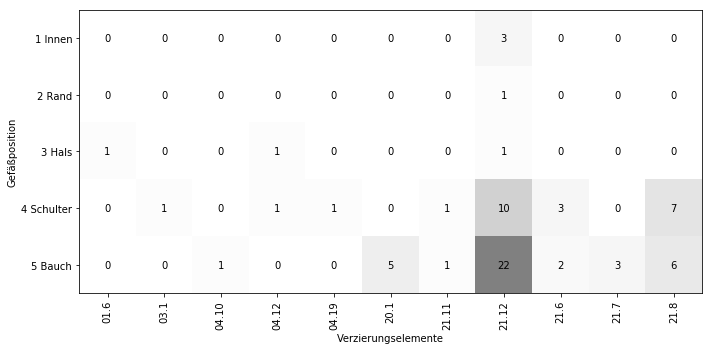

In [4]:
fig = plt.figure()
fig.set_size_inches(10, 7.5)
plt.imshow(df_pivot, interpolation='nearest', cmap='Greys', alpha = .5)
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
# plt.colorbar(orientation='horizontal')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/3-1-2-10_Mbenja_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

In [208]:
df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


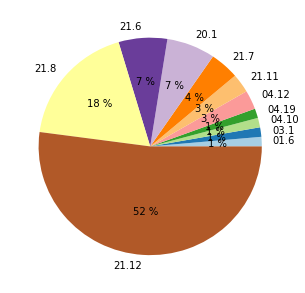

In [209]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [210]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot['Prozent'] = df_pivot["objID"]/df_pivot["objID"].sum()*100
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = False)
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
pos,,
5 Bauch,40,56.338028
4 Schulter,24,33.802817
1 Innen,3,4.225352
3 Hals,3,4.225352
2 Rand,1,1.408451


In [211]:
a = pd.Series({'Roulette-Verzierung':len(df.loc[df['verzName'].str.contains("21.")].index),
               'Weitere Verzierungen':len(df.loc[~df['verzName'].str.contains("21.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Roulette-Verzierung,60,84.507042
Weitere Verzierungen,11,15.492958


In [212]:
# nur Roulette-Verzierungen herausfiltern
b = df.loc[df['verzName'].str.contains("21.")]

c = pd.Series({'vegetabilisches Roulette':len(b.loc[df['verzName_alt'].str.contains("V08a")].index),
               'Schnitz-Roulette':len(b.loc[~df['verzName_alt'].str.contains("V08a")].index)})
c = pd.DataFrame(c)
c['Prozent'] = c[0]/c[0].sum()*100
c

,0,Prozent
Schnitz-Roulette,60,100.0
vegetabilisches Roulette,0,0.0


#### Nur Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


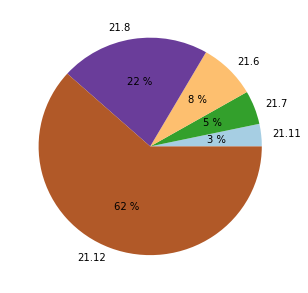

In [213]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

#### Nicht Roulette

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


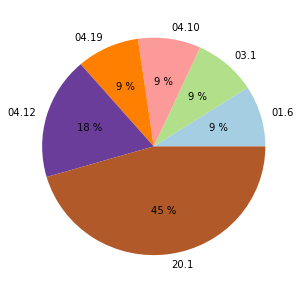

In [214]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) Not Like '%21.%')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

## Verbreitung

In [215]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
14,Pikunda (Fpl. 255),255,16.635736,0.549344,MBJ (?)
7,Molanda (Fpl. 258),258,16.537896,0.945646,MBJ
5,Mandombe (Fpl. 259),259,16.522700,1.116917,MBJ
2,Ikelemba (Fpl. 260),260,16.504824,1.227166,MBJ
8,Mosanya (Fpl. 262),262,16.447391,1.213000,MBJ
12,Ouesso (Fpl. 265),265,16.057202,1.617344,MBJ
3,Maboko (Fpl. 267),267,16.135199,1.731363,MBJ
4,Mai impembe (Fpl. 271),271,16.087011,2.087501,MBJ
0,Bonda (Fpl. 272),272,16.084390,2.189246,MBJ
15,Sakao (Fpl. 273),273,16.145396,2.174978,MBJ (?)


In [216]:
df.to_csv("../data/processed/3-1-2-10_MBJ_Verbreitung.csv", index = False)

In [217]:
len(df)

16

## Tafeln

In [218]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,57,3,MLD,87/101,29,"14, 29, 84, 123",MBJ,C2 (?),None,None
1,59,14,IKM,87/101,NaN,31,MBJ,None,None,None
2,59,16,IKM,87/101,44,"44, 46, 57",MBJ,None,None,None
3,59,17,IKM,87/101,45,"45, 49, 53",MBJ,None,None,None
4,59,21,IKM,87/101,53,"45, 49, 53",MBJ,None,None,None
5,59,24,IKM,87/101,49,"45, 49, 53",MBJ,None,None,None
6,59,18,IKM,87/101,NaN,47,MBJ,None,None,None
7,59,19,IKM,87/101,59,"51, 59, 63",MBJ,None,None,None
8,59,23,IKM,87/101,51,"51, 59, 63",MBJ,None,None,None
9,59,20,IKM,87/101,NaN,54,MBJ,None,None,None
